In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
import warnings
warnings.simplefilter('ignore')
from IPython.display import Image

from my_ml_tools.my_ml_plot import Plot_1d_lr

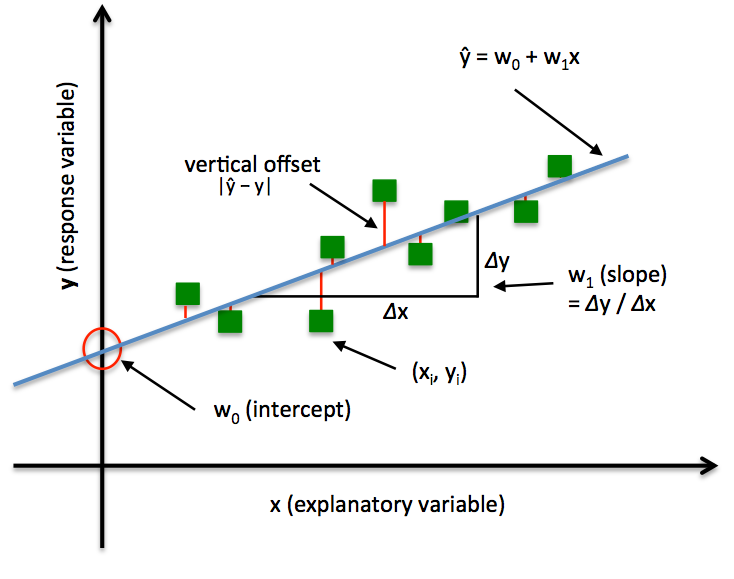

In [2]:
Image(filename = './charts/simple_regression.png', width=500)

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.feature_names, boston.data.shape)
print( boston.target.shape)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] (506, 13)
(506,)


### boston.DESCR
#### Attribute Information (in order)
> - CRIM:     per capita crime rate by town   
> - ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.   
> - INDUS"    proportion of non-retail business acres per town   
> - CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)   
> - NOX:      nitric oxides concentration (parts per 10 million)   
> - RM:       average number of rooms per dwelling   
> - AGE:      proportion of owner-occupied units built prior to 1940   
> - DIS:      weighted distances to five Boston employment centres   
> - RAD:      index of accessibility to radial highways   
> - TAX:      full-value property-tax rate per USD10,000   
> - PTRATIO:  pupil-teacher ratio by town   
> - B:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town   
> - LSTAT:    % lower status of the population   
> - MEDV:     Median value of owner-occupied homes in USD1000's

In [4]:
    df = pd.DataFrame(boston.data, columns=boston.feature_names)
    df['MEDV'] = boston.target
    df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

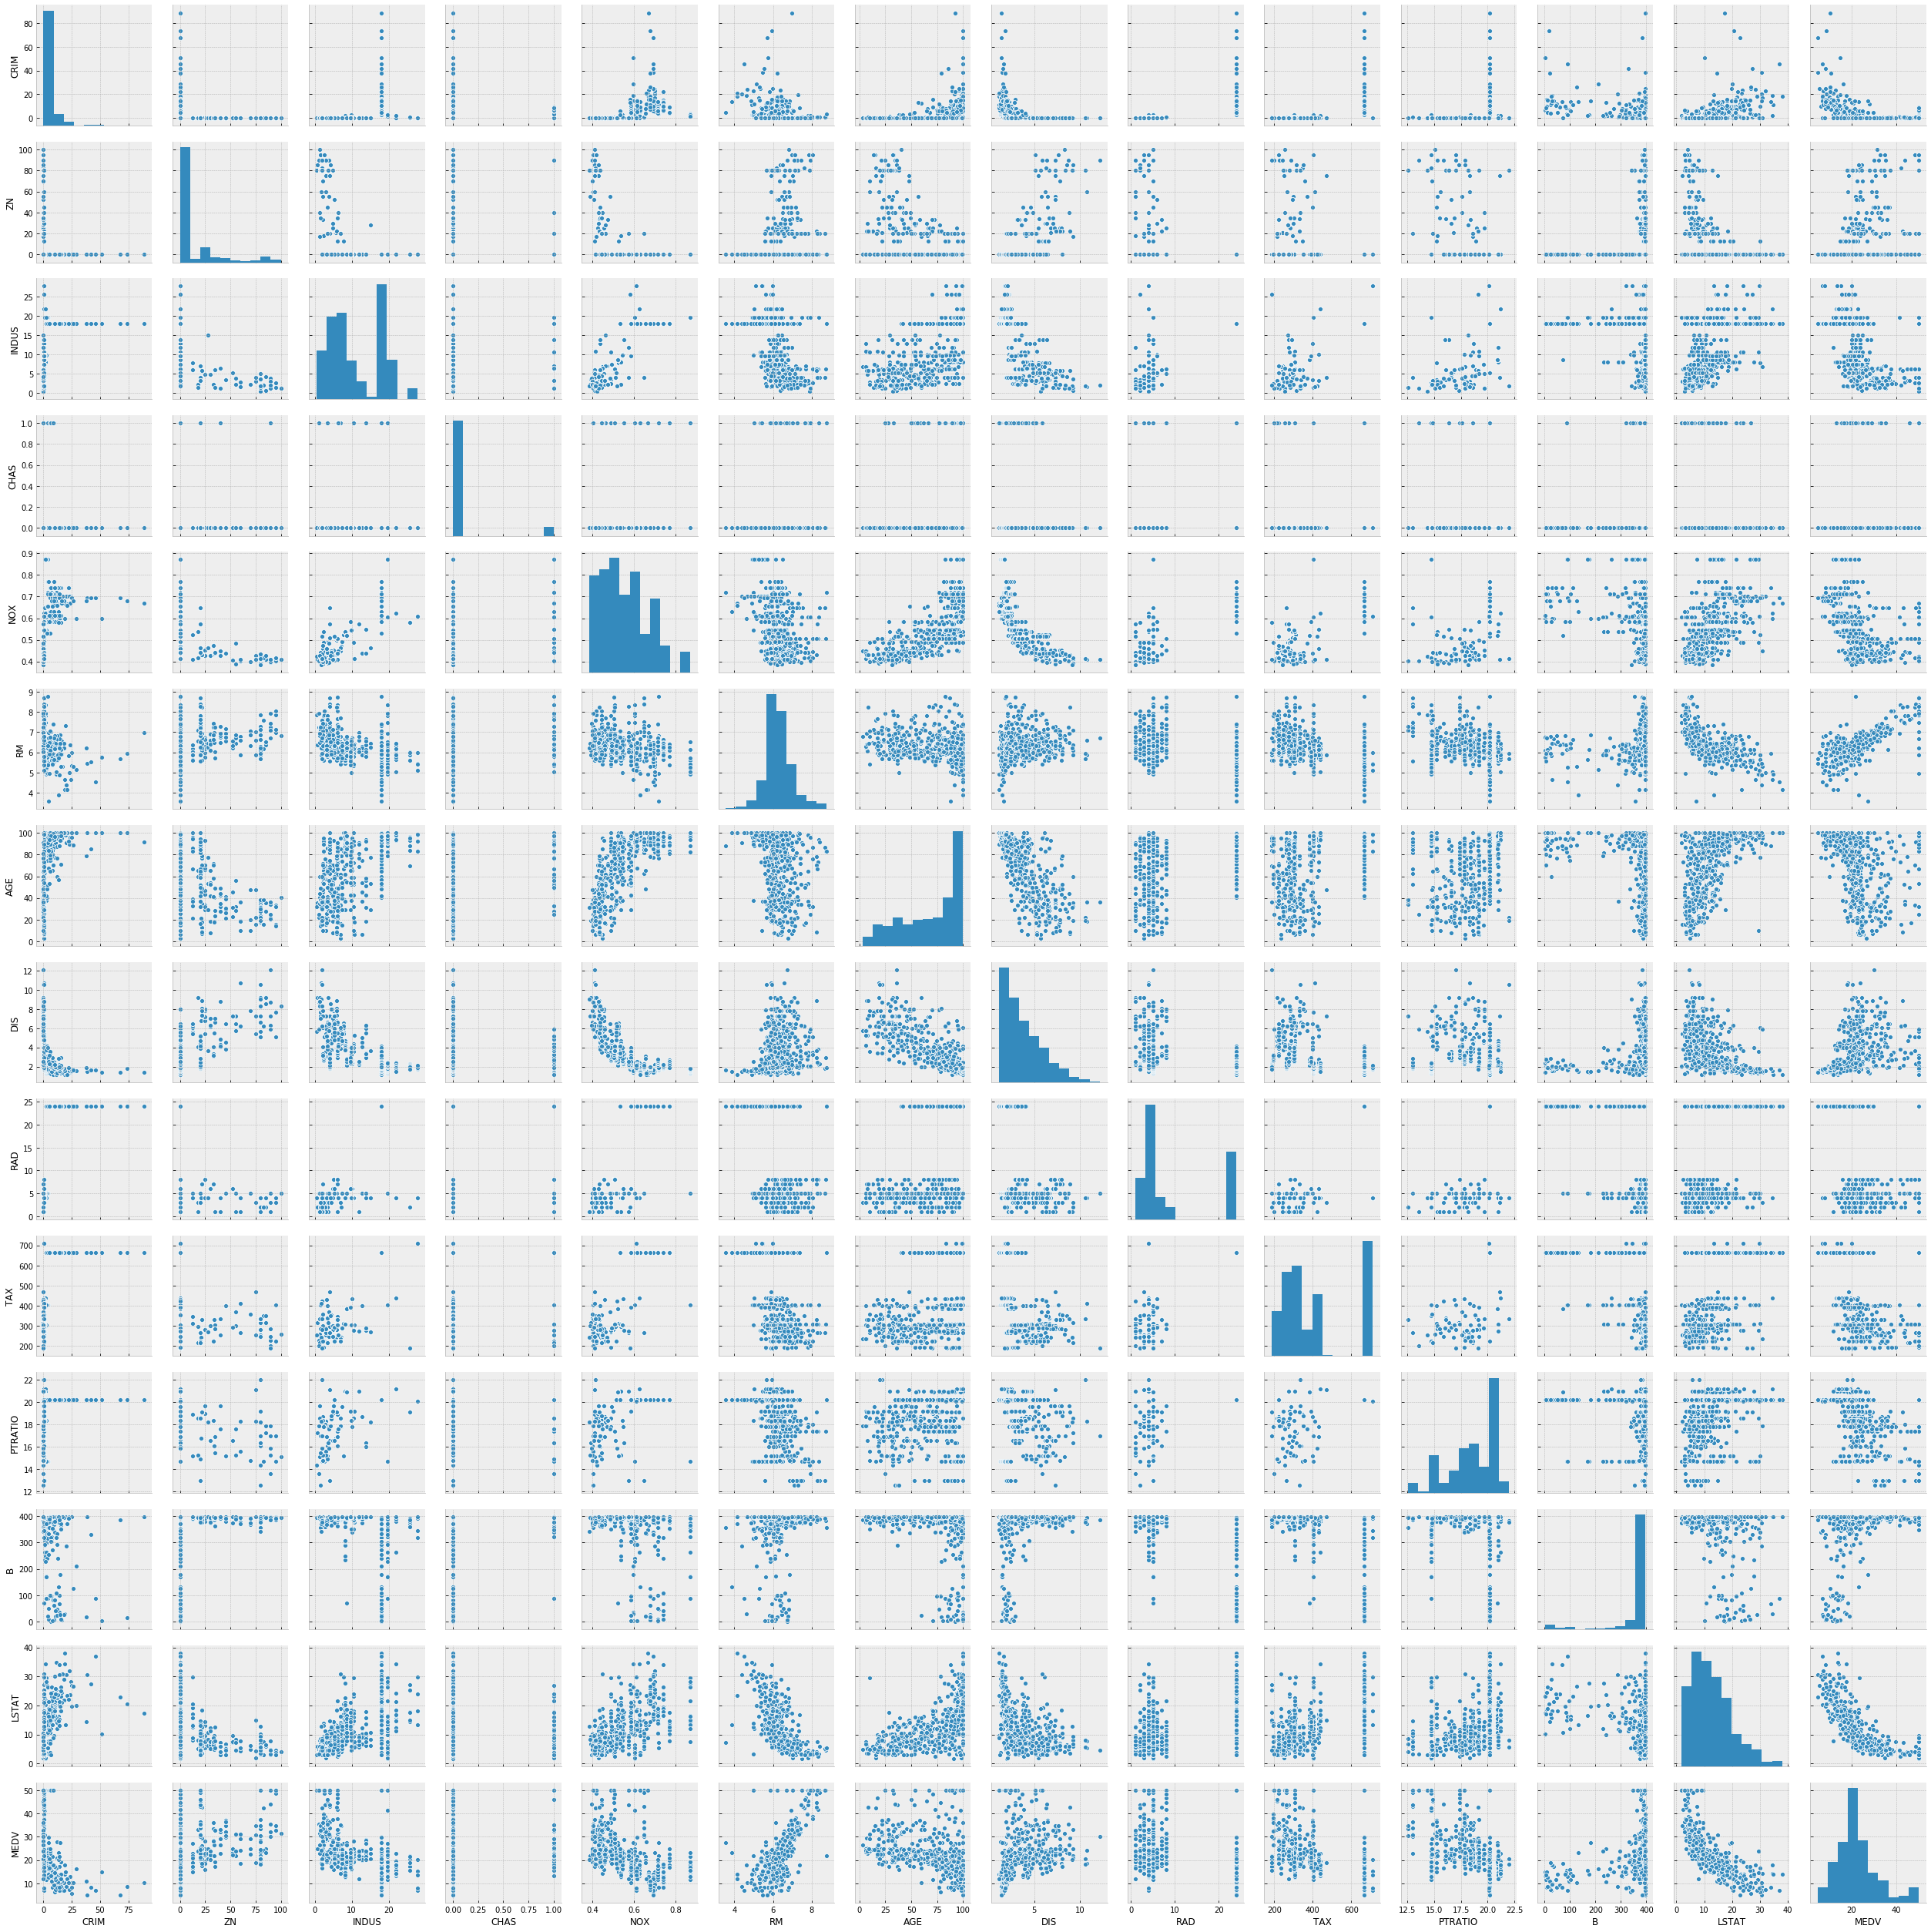

In [7]:
sns.pairplot(df)

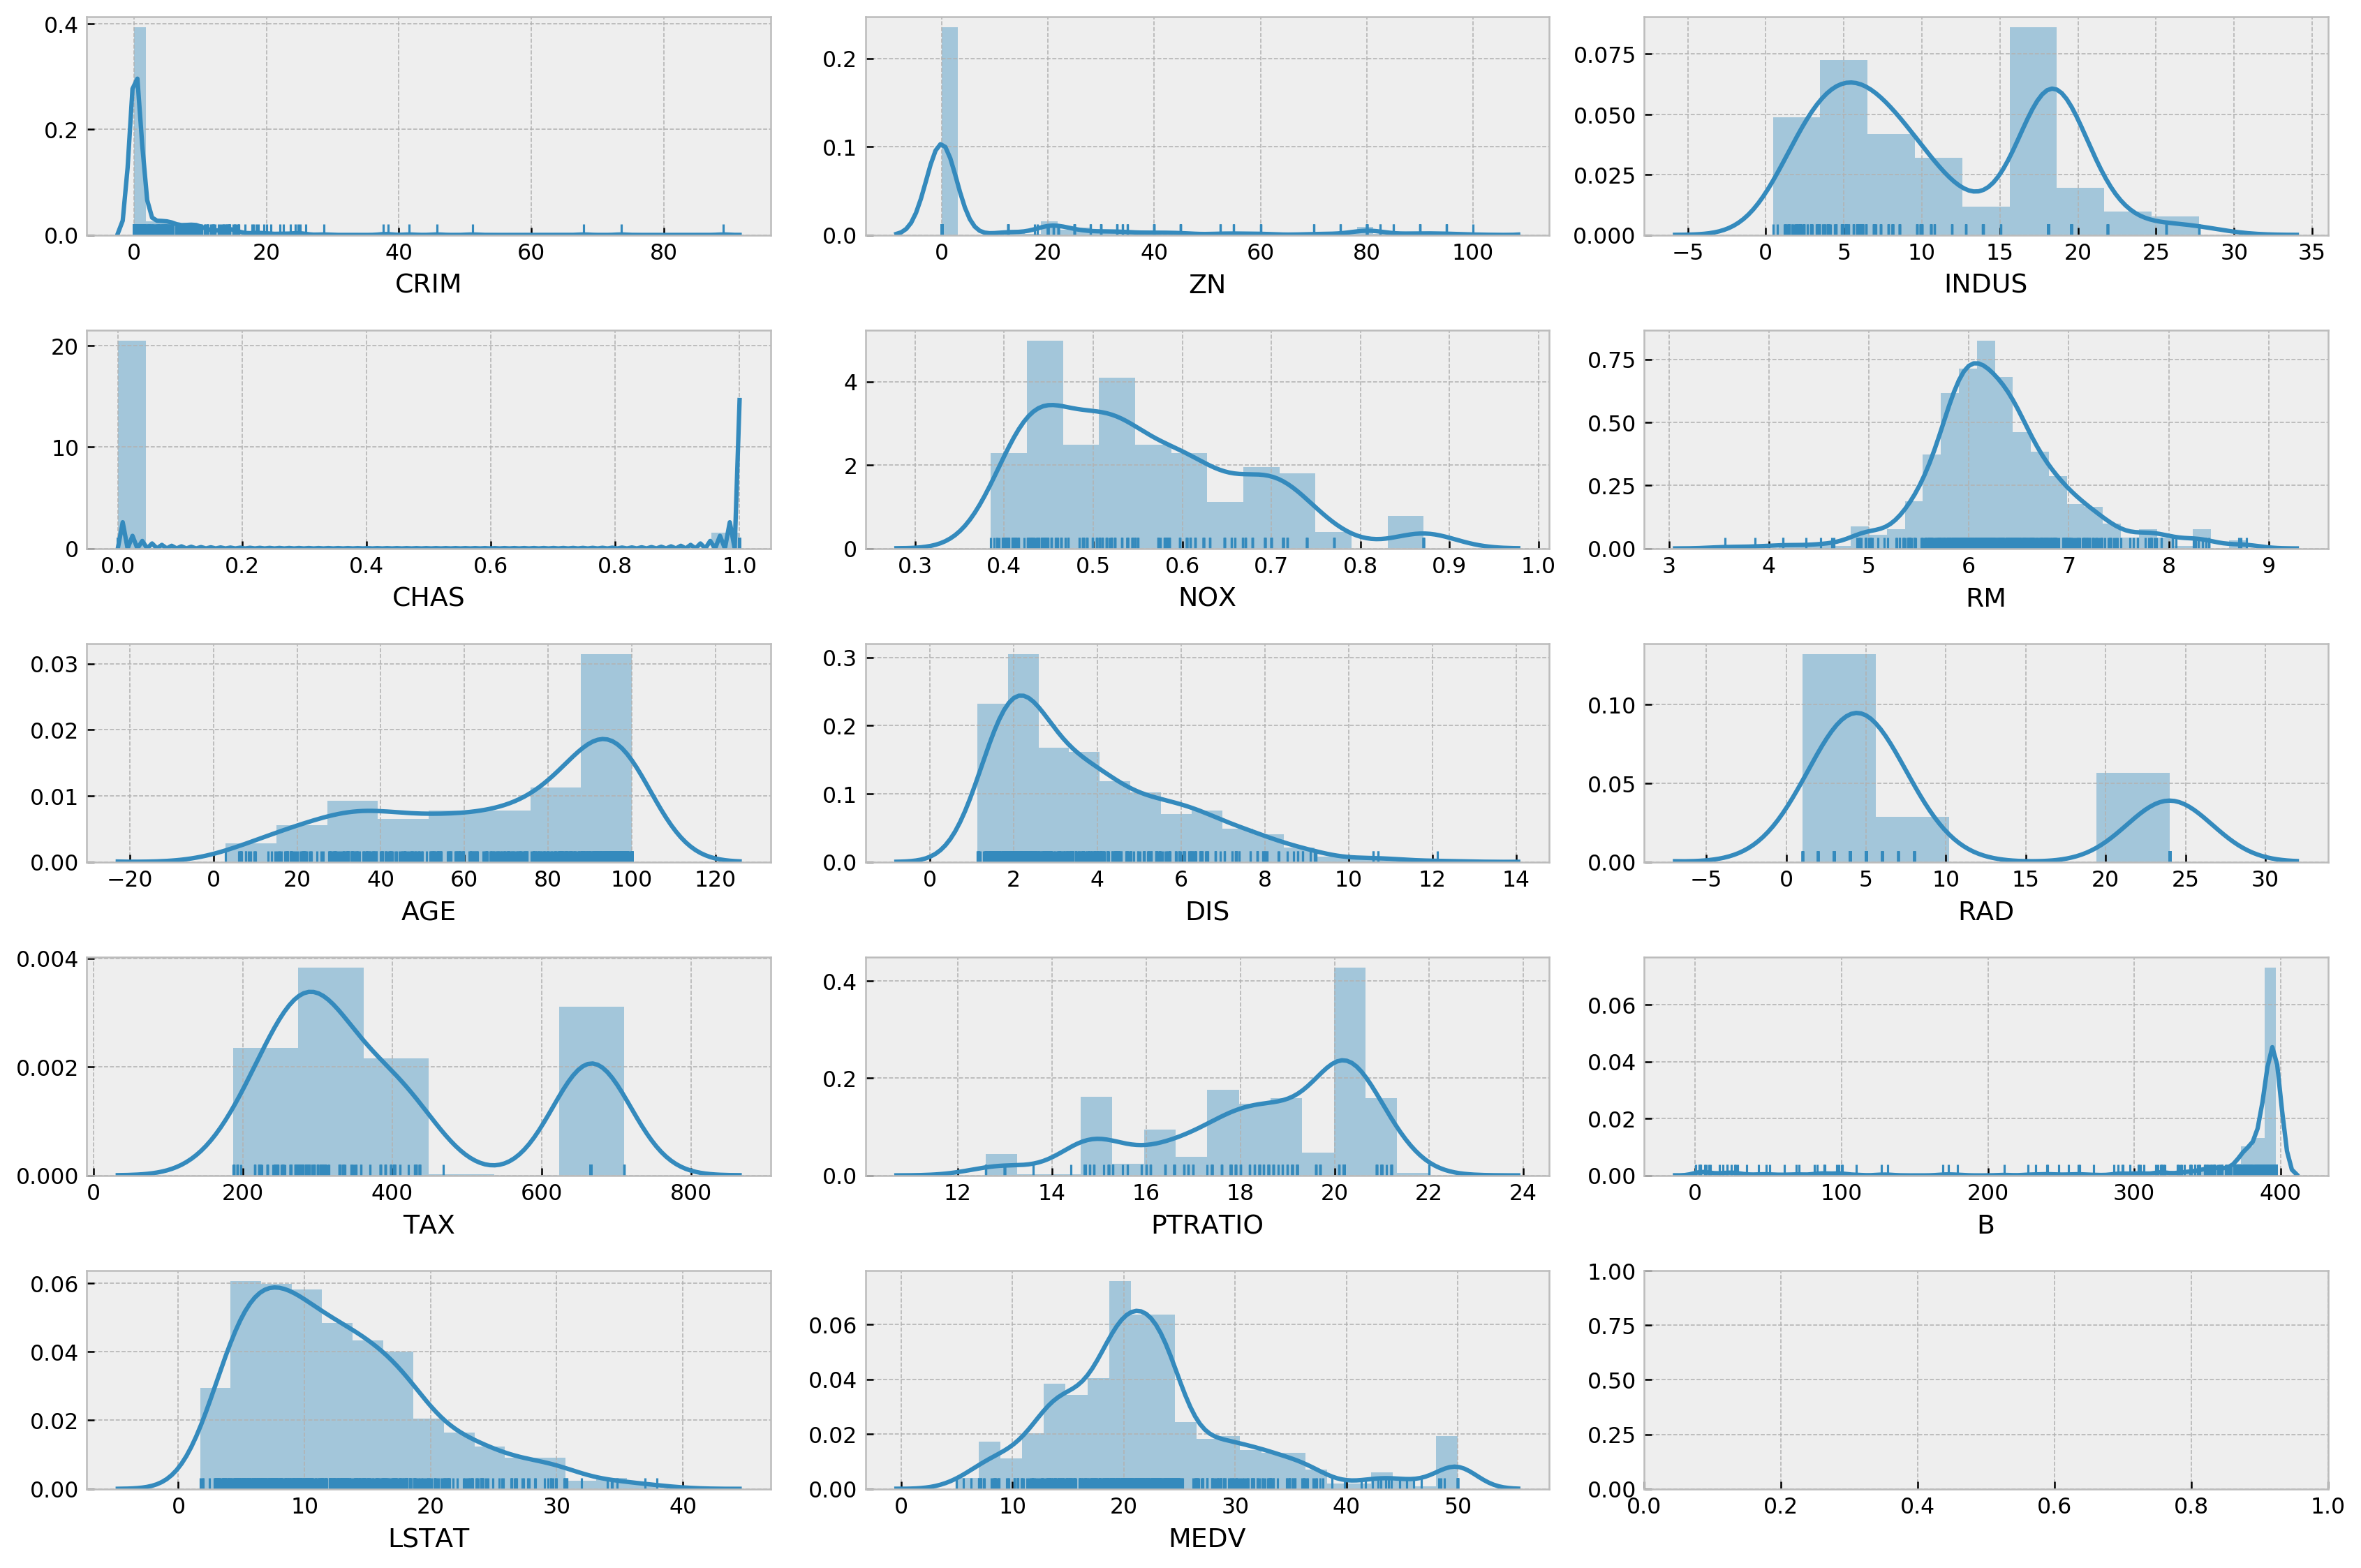

In [8]:
n_cols = 3
n_rows = int(np.ceil(df.shape[1] / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, dpi=227, figsize=(5*n_cols, 2*n_rows))
for ax, col in zip(axes.ravel(), df):
    sns.distplot(df[col], rug=True, ax=ax)
plt.tight_layout()

In [9]:
def plot_correlation_map(corr):
    def get_color(correlation):
        if correlation == 1.0:
            color = 'white'
        elif correlation >= 0.7:
            color = 'indianred'
        elif correlation >= 0.5:
            color = 'darkorange'
        elif correlation >= 0.3:
            color = 'royalblue'
        else:
            color = 'gray'
        return color

    plt.figure(figsize=(len(corr)*0.6, len(corr)*0.6))
    for c, col in enumerate(corr.columns):
        for r in range(len(corr) - c):
            correlation = corr.iloc[r, len(corr) - c -1]
            plt.scatter(r, c, s=correlation*300, color=get_color(correlation))
        for r in range(len(corr) - c, len(corr)):
            correlation = corr.iloc[r, len(corr) - c -1]
            plt.text(r-0.25, c-0.15, f"{correlation:.2f}", {'color': get_color(correlation), 'fontsize': 8})

    plt.xticks(np.linspace(-0.5, len(corr)-0.5, len(corr)+1), corr.columns, ha='left', rotation=90)
    plt.yticks(np.linspace(len(corr)-0.5, -0.5, len(corr)+1), corr.columns, va='top')
    plt.title('Correlation of Variables')
    plt.grid('on', linestyle=":")
    plt.axis('equal')
    plt.tight_layout()
    #plt.savefig('fig.png', dpi=220, transparent=False)

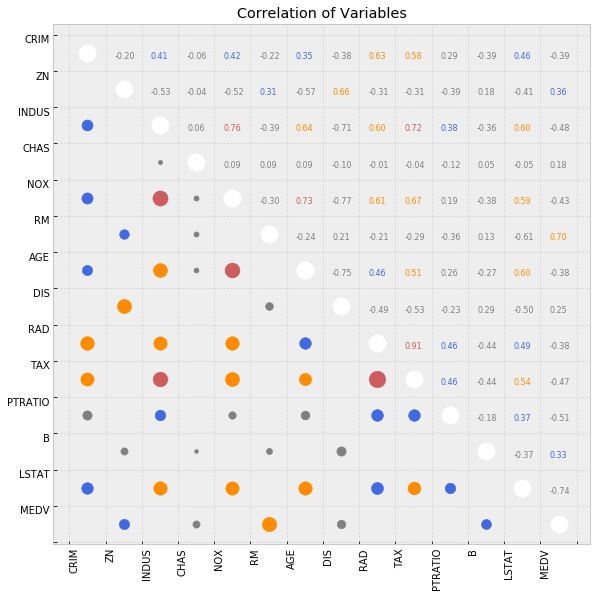

In [10]:
plot_correlation_map(df.corr())

### $R^2$ score
$$ R^2 = 1 - \frac{SSE} {SST} $$

$$ SSE = \sum_{i=1}^{n} \big(y^{(i)} - \hat{y^{(i)}}\big)^2 $$ 

$$ SST = \sum_{i=1}^{n} \big(y^{(i)} - \mu_y\big)^2 $$ 

In [11]:
class myLinearRegression:
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        X1 = np.c_[np.ones(X.shape[0]), X]
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            error = (y - output)
            self.w_ += self.eta * np.dot(X1.T, error)
            self.cost_.append((error ** 2).sum() / 2)
        return self
            
    def net_input(self, X):
        return np.dot(np.c_[np.ones(X.shape[0]), X], self.w_)
    
    def predict(self, X):
        return self.net_input(X)
    
    def score(self, X, y):
        y_pred = self.net_input(X)
        SSE = ((y - y_pred) ** 2).sum()
        SST = ((y - y.mean()) ** 2).sum()
        R2 = 1 - SSE / SST
        return R2
        

(506, 1) (506,)
R^2 score of myLinear Regression:  0.484


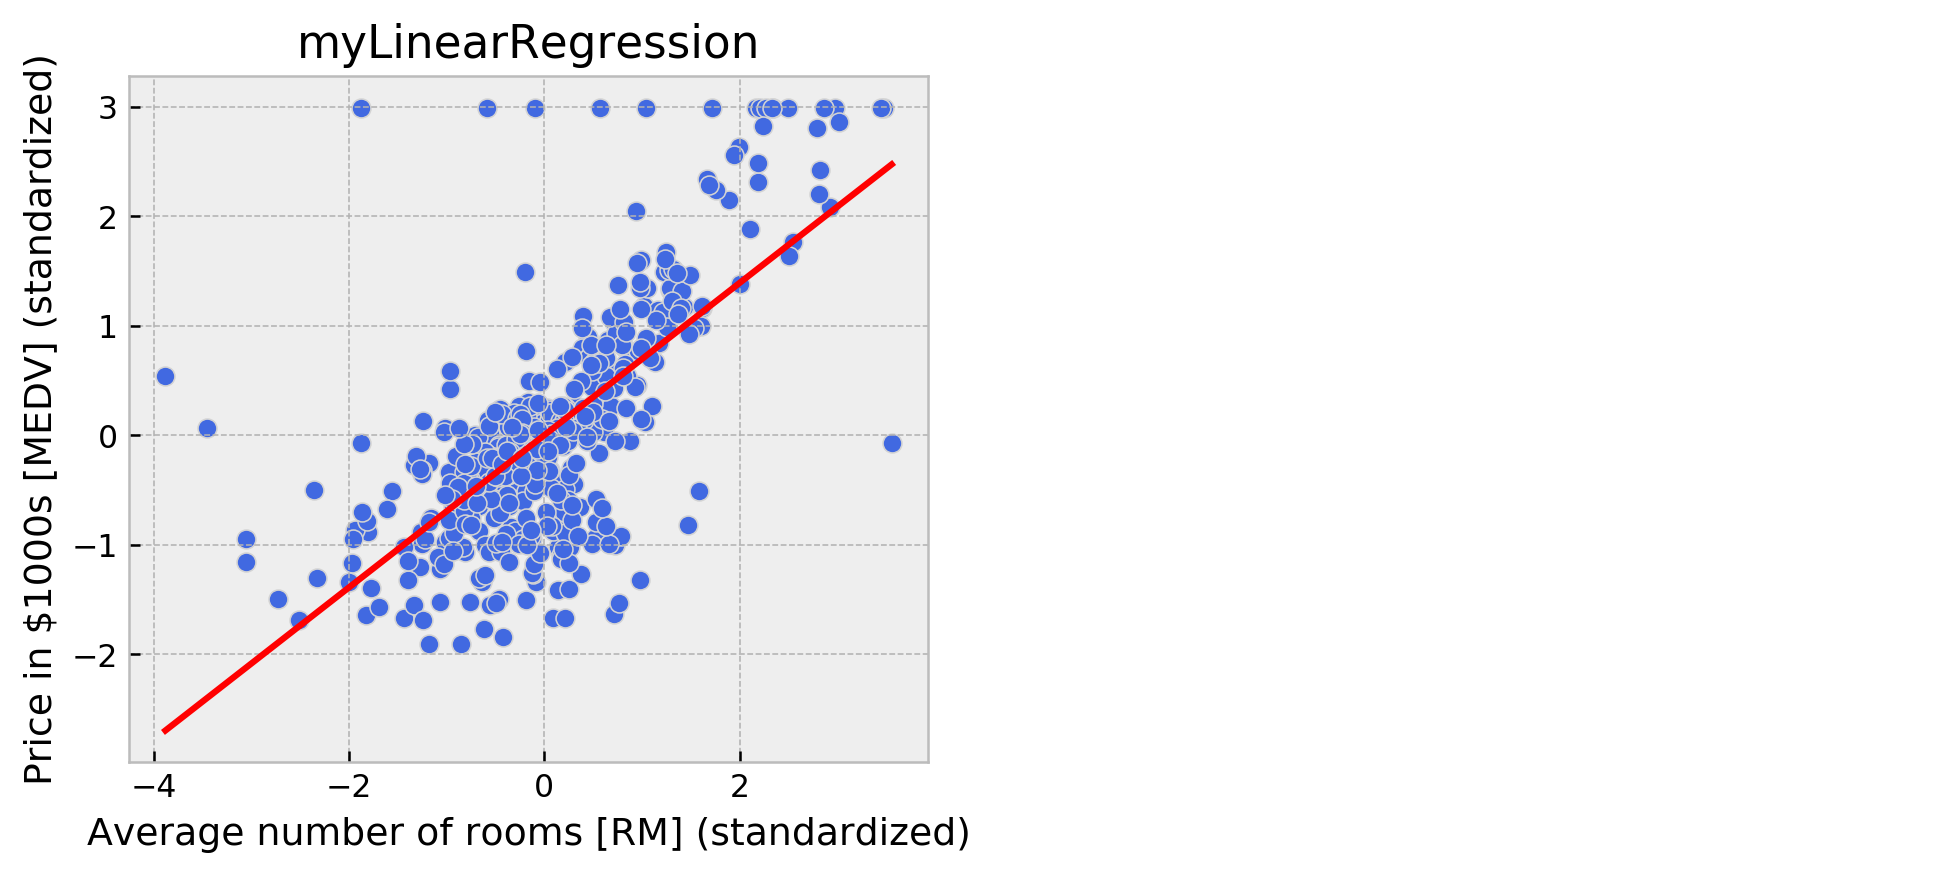

In [12]:
X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)
X = sc_X.transform(X)
y = sc_y.transform(y).ravel()
print(X.shape, y.shape)

lr = myLinearRegression()
lr.fit(X, y)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
Plot_1d_lr(lr, X, y, ax=axes[0])
axes[0].set_xlabel('Average number of rooms [RM] (standardized)')
axes[0].set_ylabel('Price in $1000s [MEDV] (standardized)')
axes[0].set_title('myLinearRegression')
axes[1].axis('off')
print(f'R^2 score of myLinear Regression: {lr.score(X, y): .3f}')

(0.0, 1.0, 0.0, 1.0)

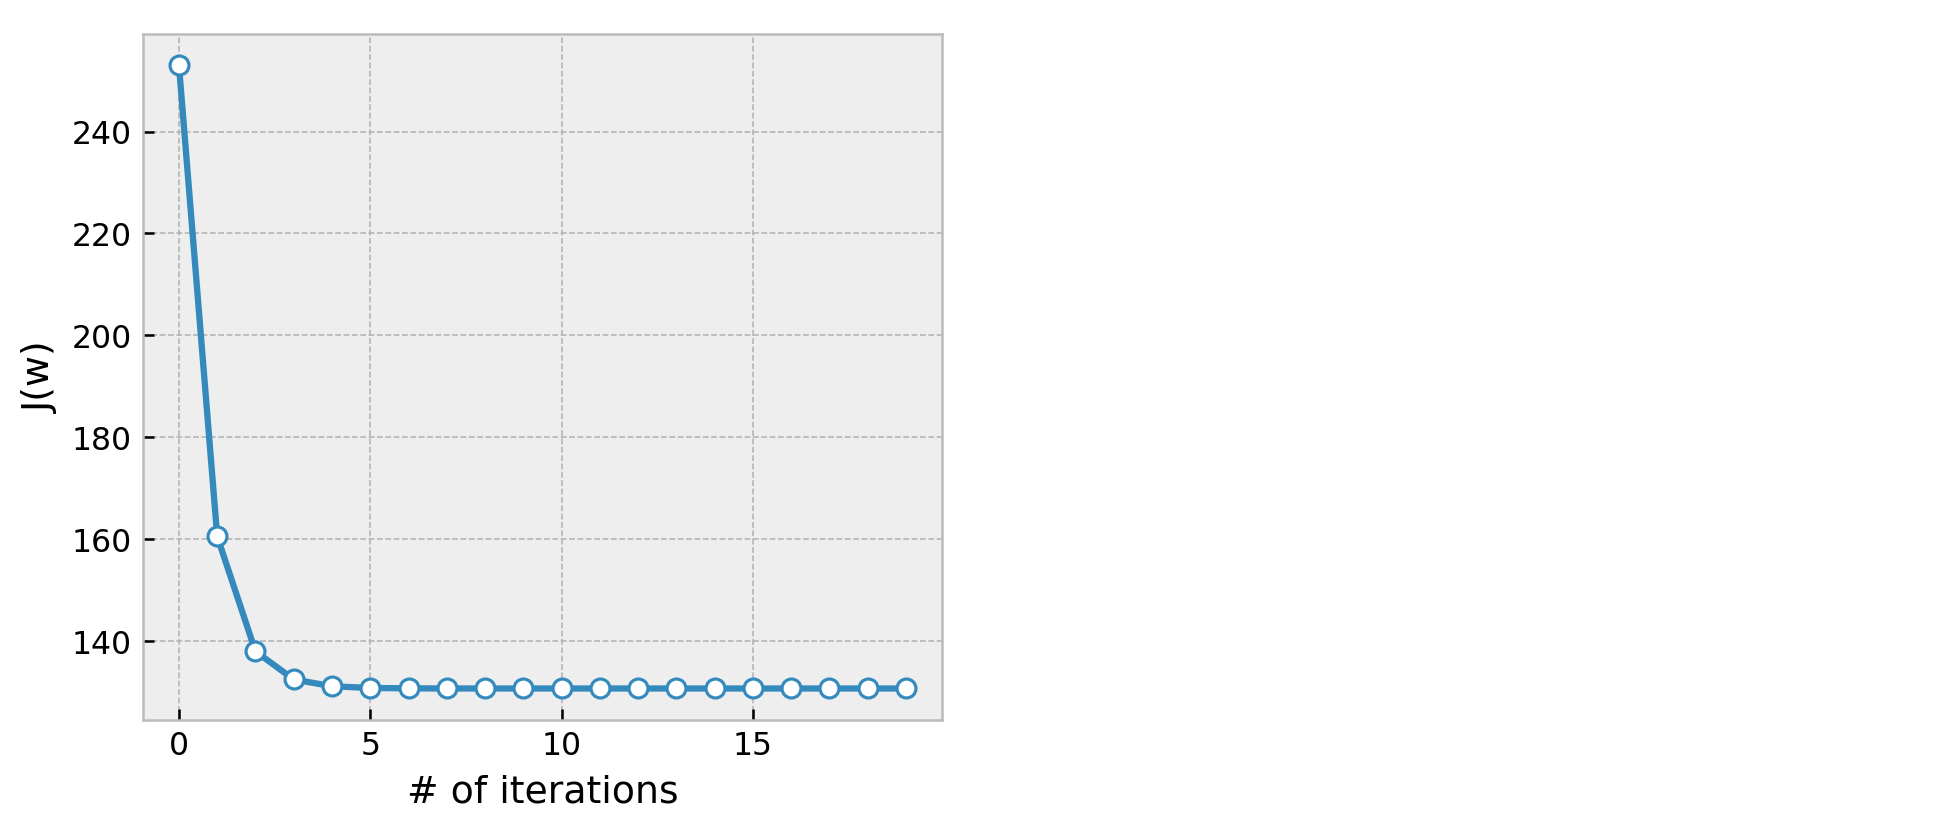

In [13]:
fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
axes[0].plot(lr.cost_, marker='o', mfc='w')
axes[0].set_xlabel('# of iterations')
axes[0].set_ylabel('J(w)')
axes[1].axis('off')

In [14]:
num_of_rooms = np.array([5]).reshape(-1, 1)
num_of_rooms = sc_X.transform(num_of_rooms)
print(f'Median price for a 5-room house: ${sc_y.inverse_transform(lr.predict(num_of_rooms))[0]*1000:.0f}')
print(lr.w_)

Median price for a 5-room house: $10840
[-4.97379915e-16  6.95359426e-01]


(0.0, 1.0, 0.0, 1.0)

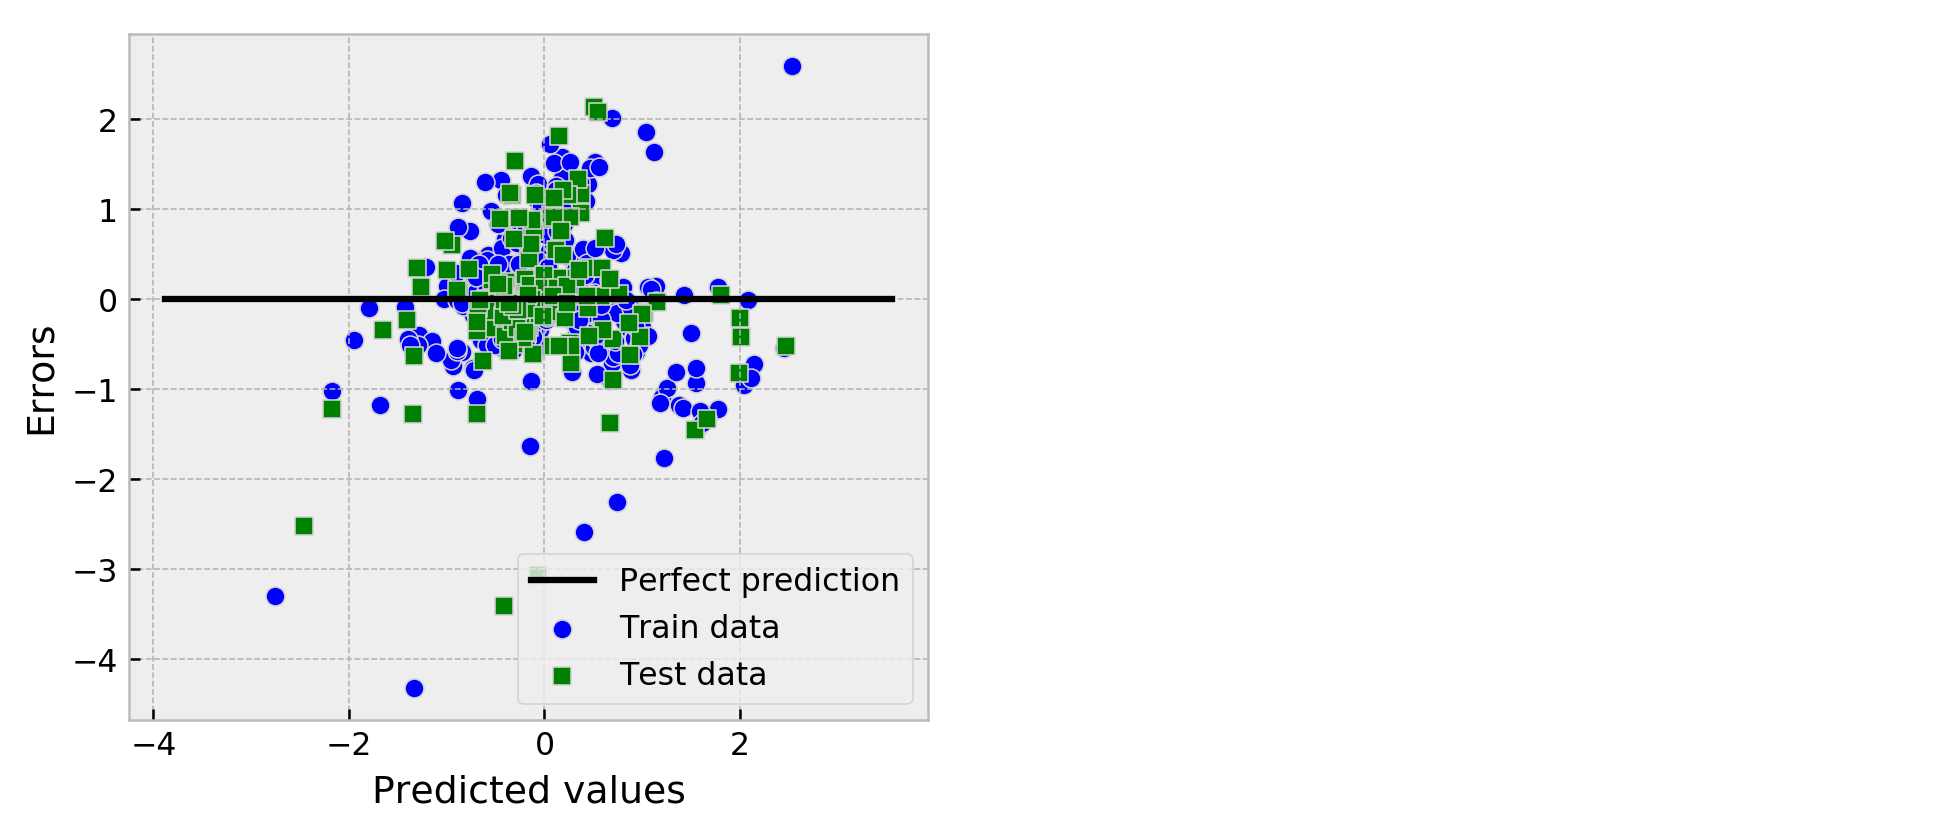

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = myLinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
axes[0].scatter(y_train_pred, y_train_pred - y_train, marker='o', c='blue', edgecolor='lightgray')
axes[0].scatter(y_test_pred, y_test_pred - y_test, marker='s', c='green', edgecolor='lightgray')
axes[0].plot([X.min(), X.max()], [0, 0], 'k')
axes[0].legend(['Perfect prediction', 'Train data', 'Test data'])
axes[0].set_xlabel('Predicted values')
axes[0].set_ylabel('Errors')
axes[1].axis('off')

(506, 1) (506,)
-34.67062077643857 [9.10210898]
R^2 score of lr_sk: 0.484


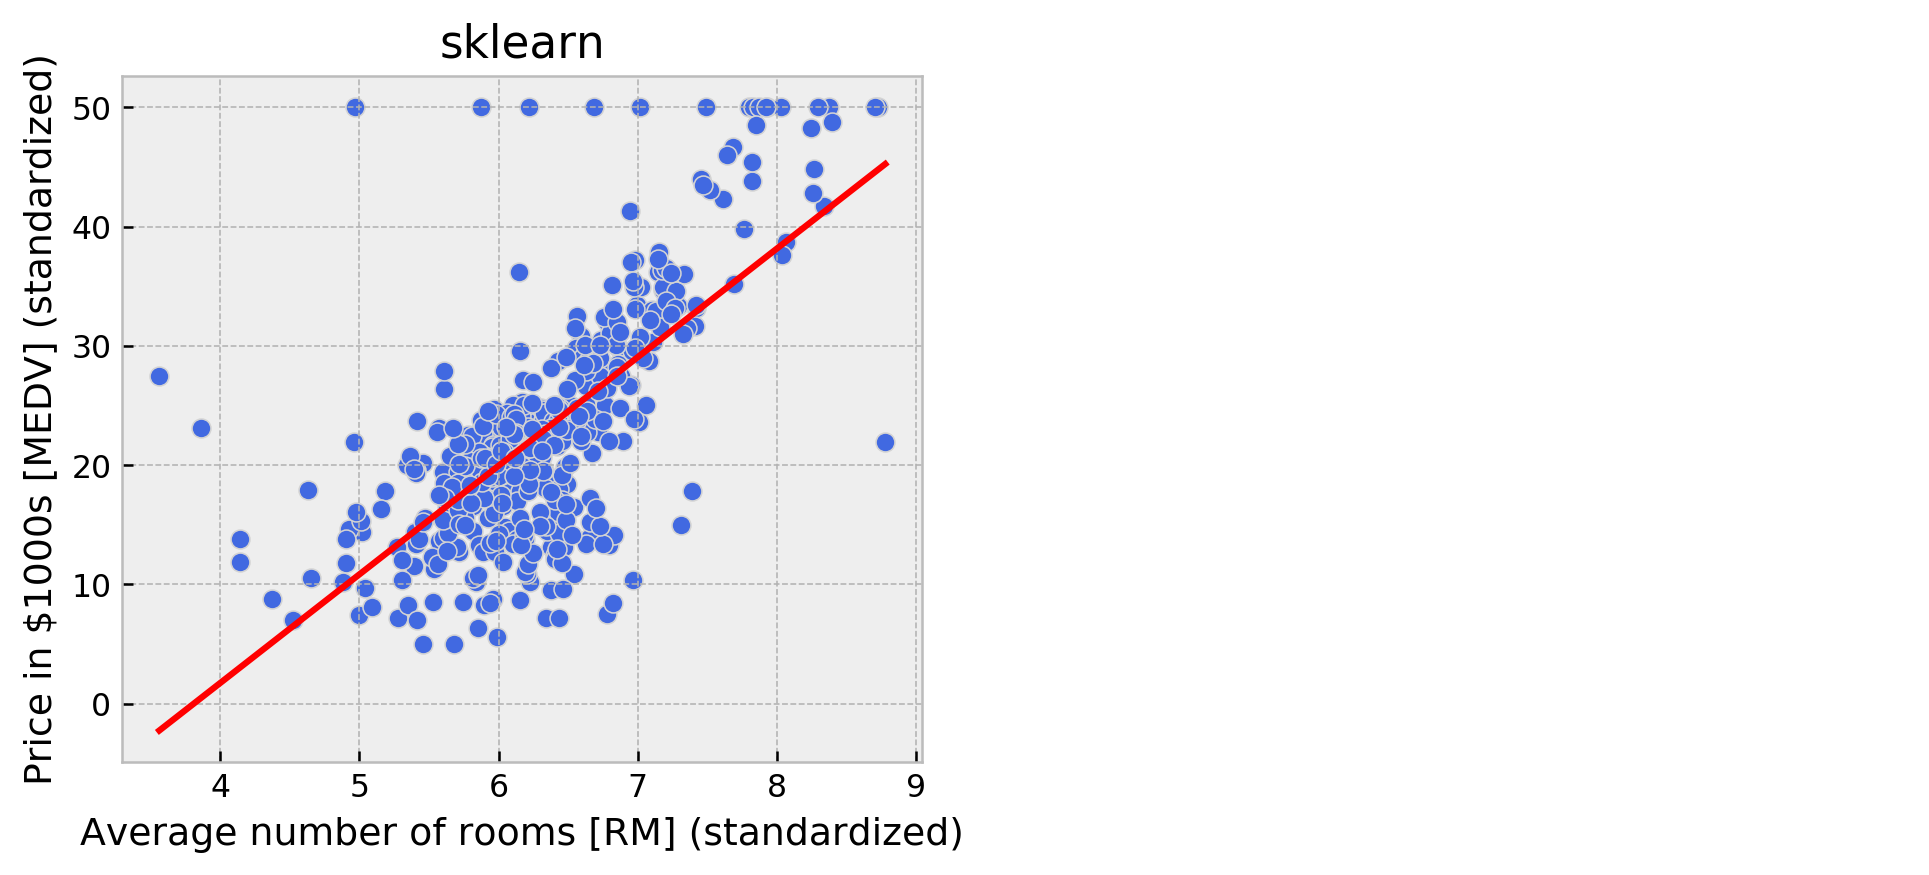

In [16]:
from sklearn.linear_model import LinearRegression

X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values
print(X.shape, y.shape)

lr_sk = LinearRegression()
lr_sk.fit(X, y)
print(lr_sk.intercept_, lr_sk.coef_)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
Plot_1d_lr(lr_sk, X, y, ax=axes[0])
axes[0].set_xlabel('Average number of rooms [RM] (standardized)')
axes[0].set_ylabel('Price in $1000s [MEDV] (standardized)')
axes[0].set_title('sklearn')
axes[1].axis('off')
from sklearn.metrics import r2_score
print(f'R^2 score of lr_sk: {r2_score(y, lr_sk.predict(X)):.3f}')

### Closed-form solution: Normal Equation
$$ w = (X^T X)^{-1} X^T y$$

> don't need to choose $\eta$    
> don't need to iterate - computed in one step   
> slow if $n$ is large ($n \geq 10^4$)   
> need to compute $(X^T X)^{-1}$ - very slow   
> if $(X^T X)$ is not invertible - we have problems

In [17]:
# Normal Equation
X1 = np.hstack([np.ones((X.shape[0], 1)), X])
w_opt = np.linalg.inv(X1.T.dot(X1)).dot(X1.T).dot(y)
w_opt

array([-34.67062078,   9.10210898])

### Outliers
> Outliers in regression are observations that fall far from the “cloud” of points. These points are especially important because they can have a strong inﬂuence on the least squares line.
### RANSAC (RANdom SAample Consensus)
> Random sample consensus (RANSAC) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates. Therefore, it also can be interpreted as an outlier detection method.

(0.0, 1.0, 0.0, 1.0)

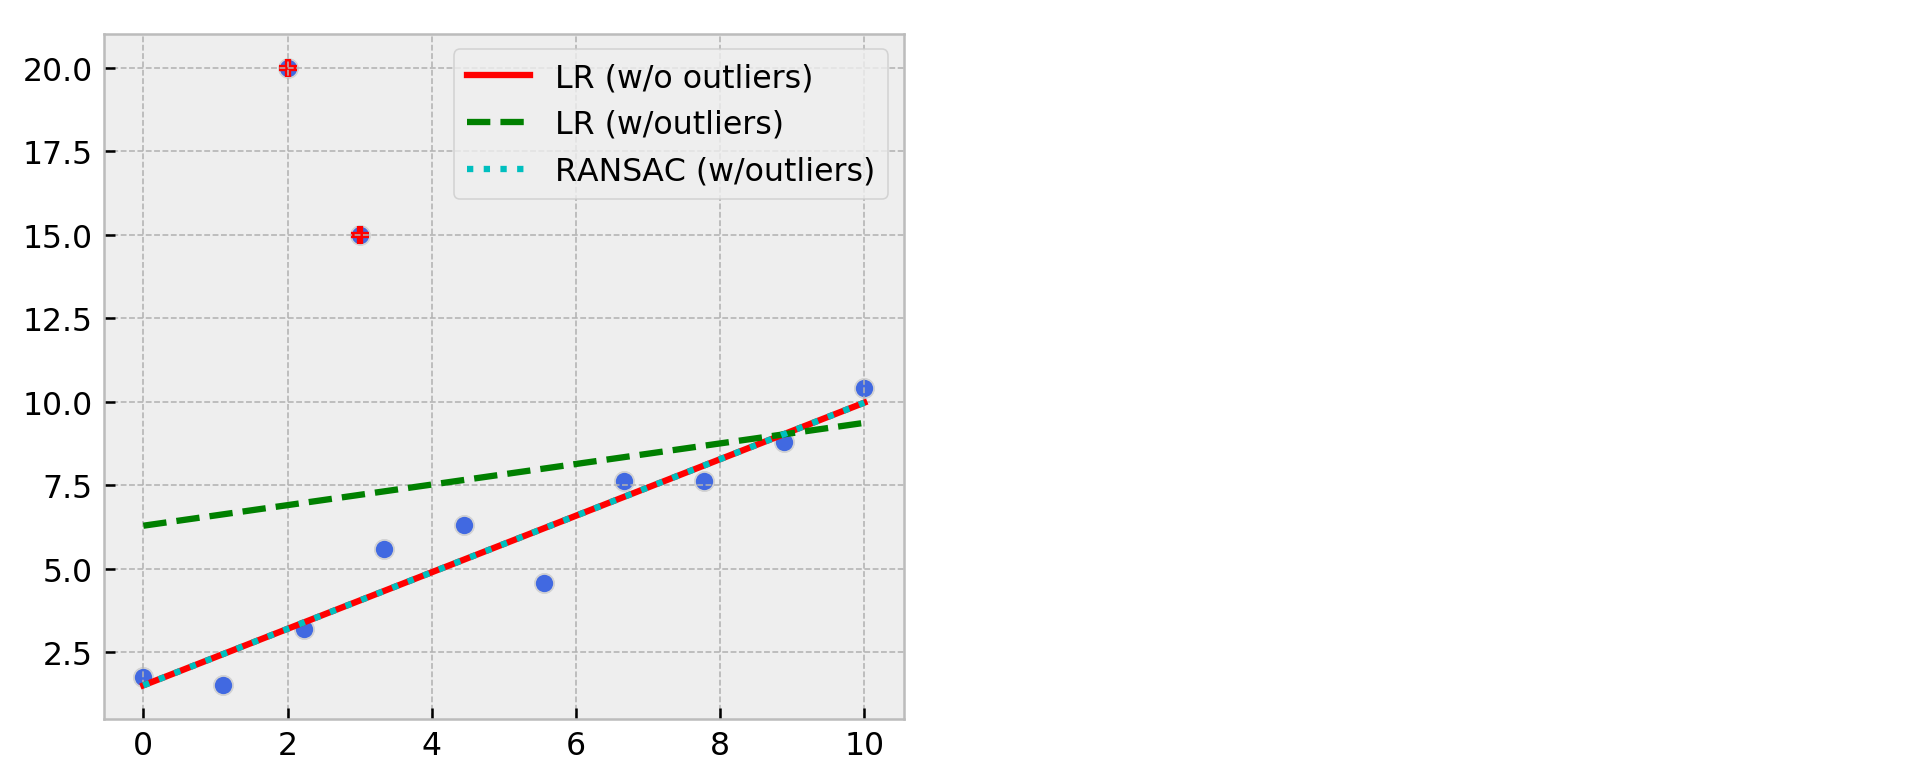

In [18]:
rng = np.random.RandomState(0)
X = np.linspace(0, 10, 10)
y = X + rng.randn(10)
X = X.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
Plot_1d_lr(lr, X, y, kwargs={'fmt': 'r-'}, ax=axes[0])

# Add outliers
X = np.append(X, [3, 2])
y = np.append(y, [15, 20])
X = X.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X, y)

Plot_1d_lr(lr, X, y, kwargs={'fmt': 'g--'}, ax=axes[0])

from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()
ransac.fit(X, y)
Plot_1d_lr(ransac, X, y, kwargs={'fmt': 'c:'}, ax=axes[0])

axes[0].legend(['LR (w/o outliers)', 'LR (w/outliers)', 'RANSAC (w/outliers)'])

inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask
axes[0].scatter(X[outlier_mask], y[outlier_mask], marker='+', c='r')
axes[1].axis('off')

### Non-linear data
> Polynomial Features

(0.0, 1.0, 0.0, 1.0)

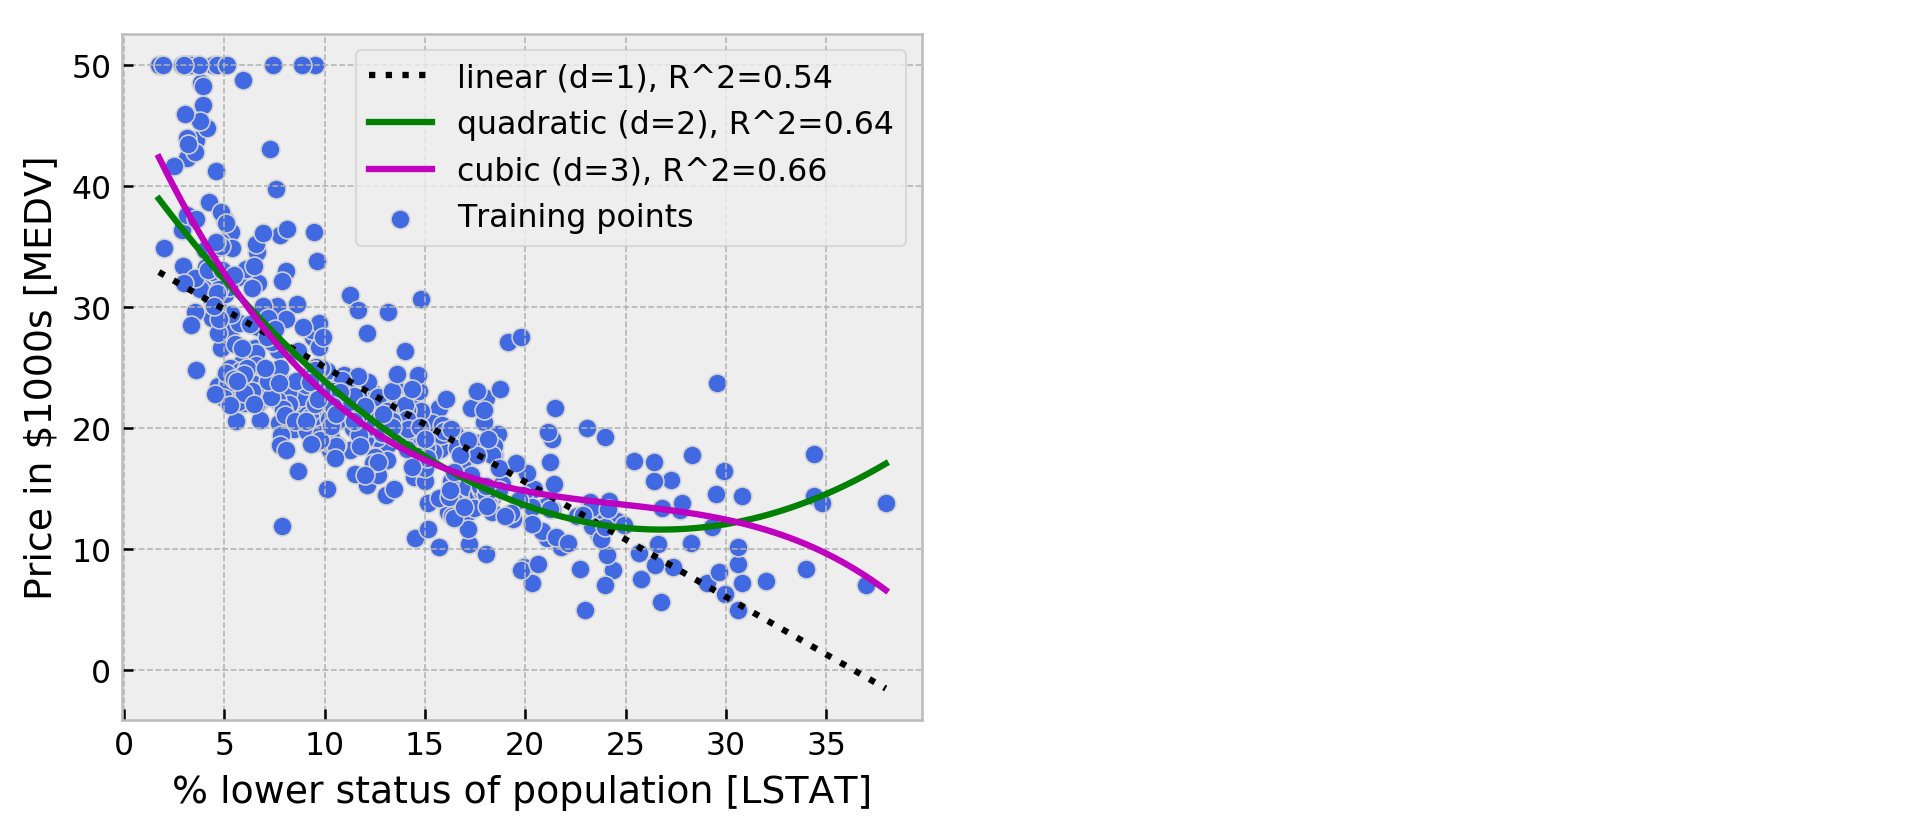

In [19]:
X = df[['LSTAT']].values
y = df['MEDV']

from sklearn.preprocessing import PolynomialFeatures
poly_2 = PolynomialFeatures(degree=2)
poly_3 = PolynomialFeatures(degree=3)

X2 = poly_2.fit_transform(X)
X3 = poly_3.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
Plot_1d_lr(lr, X, y, kwargs={'fmt': 'k:'}, ax=axes[0])
line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
R2_1 = r2_score(y, lr.predict(X))

lr.fit(X2, y)
y_pred_2 = lr.predict(poly_2.transform(line))
axes[0].plot(line, y_pred_2, 'g-', lw=2)
R2_2 = r2_score(y, lr.predict(X2))

lr.fit(X3, y)
y_pred_3 = lr.predict(poly_3.transform(line))
axes[0].plot(line, y_pred_3, 'm-', lw=2)
R2_3 = r2_score(y, lr.predict(X3))

axes[0].legend([
    f'linear (d=1), R^2={R2_1:.2f}',
    f'quadratic (d=2), R^2={R2_2:.2f}',
    f'cubic (d=3), R^2={R2_3:.2f}',
    f'Training points'
])
axes[0].set_xlabel('% lower status of population [LSTAT]')
axes[0].set_ylabel('Price in $1000s [MEDV]')
axes[1].axis('off')

(0.0, 1.0, 0.0, 1.0)

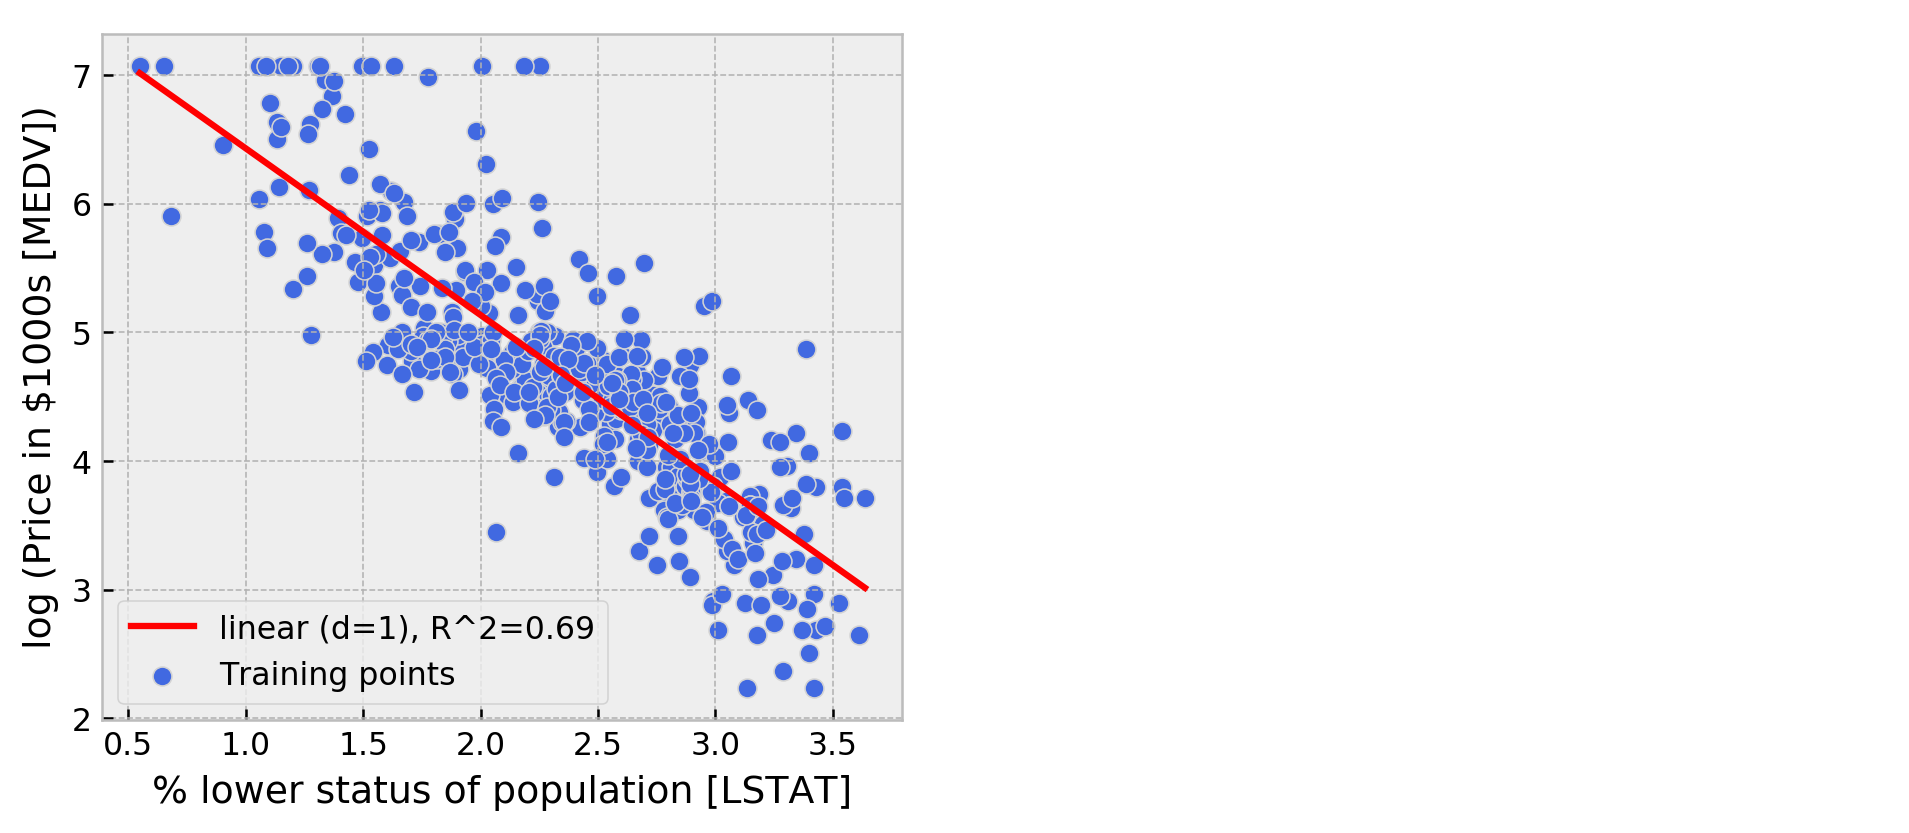

In [20]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)

lr.fit(X_log, y_sqrt)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
Plot_1d_lr(lr, X_log, y_sqrt, ax=axes[0])
R2_log = r2_score(y_sqrt, lr.predict(X_log))

axes[0].legend([
    f'linear (d=1), R^2={R2_log:.2f}',
    f'Training points'
])
axes[0].set_xlabel('% lower status of population [LSTAT]')
axes[0].set_ylabel('log (Price in $1000s [MEDV])')
axes[1].axis('off')